# FLights Data set 

## Preliminary Wrangling

The original dataset reports flights in the United States, including carriers, arrival and departure delays, and reasons for delays, from 1987 to 2008.

I will analyse the data from 2004 till 2008. The data set can be downloaded from http://stat-computing.org/dataexpo/2009/the-data.html.

In [97]:
# import modules
import pandas as pd
import numpy as np
import os
import requests
import calendar
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [98]:
flights_urls = ['http://stat-computing.org/dataexpo/2009/2007.csv.bz2',
'http://stat-computing.org/dataexpo/2009/2008.csv.bz2']

In [99]:
# download the dataset with pandas
flights_bz2 = 'flight_data_bz2'
#if not os.path.exists(flights_bz2):
#    os.makedirs(flights_bz2)

#for url in flights_urls:
#    response = requests.get(url)
#    with open (os.path.join(flights_bz2, url.split('/')[-1]), mode = 'wb') as file:
#        file.write(response.content)

## Gathering

In [100]:
df_2007= pd.read_csv('data/2007.csv', nrows=None, encoding='latin-1')
df_2007.shape

(7453215, 29)

In [101]:
df_2008= pd.read_csv('data/2008.csv', nrows=None, encoding='latin-1')
df_2008.shape

(7009728, 29)

In [102]:
# combine all datasets
df_combine = pd.concat([df_2007, df_2008], ignore_index = True)

In [162]:
df = df_combine.copy()

In [154]:
# write the combined date to a CSV file.
#df.to_csv('df.csv', index=False)

In [159]:
#df = pd.read_csv('df.csv', nrows=None, encoding='latin-1')

In [163]:
# check shape
df.shape

(14462943, 29)

In [164]:
# check df
df.sample(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
6904180,2007,12,22,6,1836.0,1720,1922.0,1810,WN,40,...,5.0,8.0,0,NaN,0,72.0,0.0,0.0,0.0,0.0
1576206,2007,3,24,6,626.0,635,754.0,802,FL,471,...,6.0,18.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
2756820,2007,5,18,5,706.0,715,830.0,849,DL,689,...,11.0,14.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
4695579,2007,8,31,5,2056.0,2058,2115.0,2125,DL,1771,...,8.0,13.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
8882561,2008,3,28,5,905.0,909,1019.0,1018,UA,1203,...,4.0,16.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
953329,2007,2,5,1,831.0,839,1234.0,1214,FL,689,...,6.0,15.0,0,NaN,0,0.0,0.0,20.0,0.0,0.0
9326431,2008,4,28,1,631.0,635,657.0,655,WN,1395,...,5.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
13365628,2008,10,16,4,1647.0,1650,2155.0,2157,CO,436,...,10.0,13.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2635464,2007,5,11,5,630.0,635,733.0,755,OO,3789,...,4.0,4.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
13011688,2008,10,17,5,1511.0,1516,1607.0,1620,OO,5732,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


## Assessing

In [165]:
# check df
df.head(30).T

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
Year,2007,2007,2007,2007,2007,2007,2007,2007,2007,2007,...,2007,2007,2007,2007,2007,2007,2007,2007,2007,2007
Month,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
DayofMonth,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
DayOfWeek,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
DepTime,1232,1918,2206,1230,831,1430,1936,944,1537,1318,...,2219,2012,1458,1345,715,2119,1530,1045,802,1415
CRSDepTime,1225,1905,2130,1200,830,1420,1840,935,1450,1315,...,2105,1940,1455,1345,720,2100,1510,1035,800,1405
ArrTime,1341,2043,2334,1356,957,1553,2217,1223,1819,1603,...,2332,2131,1614,1456,836,2310,1714,1240,953,1529
CRSArrTime,1340,2035,2300,1330,1000,1550,2130,1225,1735,1610,...,2225,2105,1620,1510,845,2250,1700,1225,955,1525
UniqueCarrier,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN,...,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN
FlightNum,2891,462,1229,1355,2278,2386,409,1131,1212,2456,...,2083,2577,2587,2643,2755,961,1330,1502,2403,976


In [166]:
# check summary statistics
df.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1.446294e+07,1.446294e+07,1.446294e+07,1.446294e+07,1.416595e+07,1.446294e+07,1.413337e+07,1.446294e+07,1.446294e+07,1.413032e+07,...,1.446294e+07,1.431129e+07,1.432588e+07,1.446294e+07,1.446294e+07,8.977950e+06,8.977950e+06,8.977950e+06,8.977950e+06,8.977950e+06
mean,2.007485e+03,6.447146e+00,1.572692e+01,3.929140e+00,1.336605e+03,1.328410e+03,1.481694e+03,1.495106e+03,2.205596e+03,1.268075e+02,...,7.229955e+02,6.772907e+00,1.637350e+01,2.061697e-02,2.381535e-03,5.887385e+00,1.155427e+00,6.056198e+00,3.243747e-02,7.760701e+00
std,4.997649e-01,3.416935e+00,8.788870e+00,1.990331e+00,4.789956e+02,4.644920e+02,5.062553e+02,4.821153e+02,1.967083e+03,7.070197e+01,...,5.622162e+02,5.048903e+00,1.159649e+01,1.420982e-01,4.874283e-02,2.556749e+01,1.192239e+01,2.037779e+01,1.245532e+00,2.592753e+01
min,2.007000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.200000e+01,...,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.007000e+03,3.000000e+00,8.000000e+00,2.000000e+00,9.290000e+02,9.270000e+02,1.107000e+03,1.115000e+03,6.060000e+02,7.600000e+01,...,3.230000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.007000e+03,6.000000e+00,1.600000e+01,4.000000e+00,1.327000e+03,1.320000e+03,1.513000e+03,1.518000e+03,1.541000e+03,1.090000e+02,...,5.760000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.008000e+03,9.000000e+00,2.300000e+01,6.000000e+00,1.730000e+03,1.720000e+03,1.910000e+03,1.906000e+03,3.534000e+03,1.570000e+02,...,9.480000e+02,8.000000e+00,1.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2.008000e+03,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.743000e+03,1.379000e+03,...,4.962000e+03,5.450000e+02,5.300000e+02,1.000000e+00,1.000000e+00,2.580000e+03,1.429000e+03,1.386000e+03,3.920000e+02,1.316000e+03


In [167]:
# check null
df.isna().sum()

Year                        0
Month                       0
DayofMonth                  0
DayOfWeek                   0
DepTime                296994
CRSDepTime                  0
ArrTime                329576
CRSArrTime                  0
UniqueCarrier               0
FlightNum                   0
TailNum                 83387
ActualElapsedTime      332626
CRSElapsedTime           1838
AirTime                332626
ArrDelay               332626
DepDelay               296994
Origin                      0
Dest                        0
Distance                    0
TaxiIn                 151649
TaxiOut                137058
Cancelled                   0
CancellationCode     14164760
Diverted                    0
CarrierDelay          5484993
WeatherDelay          5484993
NASDelay              5484993
SecurityDelay         5484993
LateAircraftDelay     5484993
dtype: int64

In [168]:
# check columns name
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

### Variable descriptions

 - **Year**:     2004 - 2008
 - **Month**	           1-12
 - **DayofMonth**	       1-31
 - **DayOfWeek**     	   1 (Monday) - 7 (Sunday)
 - **DepTime**	          actual departure time (local, hhmm)
 - **CRSDepTime** 	       scheduled departure time (local, hhmm) X
 - **ArrTime** 	       actual arrival time (local, hhmm)
 - **CRSArrTime**	       scheduled arrival time (local, hhmm)  X
 - **UniqueCarrier**	   unique carrier code                   X        
 - **FlightNum**	       flight number                         X
 - **TailNum**	           plane tail number                     X
 - **ActualElapsedTime**  in minutes
 - **CRSElapsedTime**	   in minutes
 - **AirTime**	           in minutes
 - **ArrDelay**	       arrival delay, in minutes
 - **DepDelay**	       departure delay, in minutes
 - **Origin**           origin IATA airport code
 - **Dest**	           destination IATA airport code
 - **Distance**	       in miles
 - **TaxiIn**	           taxi in time, in minutes
 - **TaxiOut**	           taxi out time in minutes
 - **Cancelled**	       was the flight cancelled?
 - **CancellationCode**   reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
 - **Diverted**	       1 = yes, 0 = no
 - **CarrierDelay**	   in minutes
 - **WeatherDelay**	   in minutes
 - **NASDelay**	       in minutes
 - **SecurityDelay**	   in minutes
 - **LateAircraftDelay**  in minutes


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14462943 entries, 0 to 14462942
Data columns (total 29 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(14), int64(10), object(5)
memory usage: 3.1+ GB


In [170]:
# check cancelled values und total no. for each
df.groupby("Cancelled").size().sort_values(ascending=False)

Cancelled
0    14164761
1      298182
dtype: int64

In [171]:
# check DepDelay statistics
df.DepDelay.describe()

count    1.416595e+07
mean     1.070695e+01
std      3.574838e+01
min     -5.340000e+02
25%     -4.000000e+00
50%     -1.000000e+00
75%      9.000000e+00
max      2.601000e+03
Name: DepDelay, dtype: float64

In [172]:
# check ArrDelay statistics
df.ArrDelay.describe()     

count    1.413032e+07
mean     9.210411e+00
std      3.893204e+01
min     -5.190000e+02
25%     -1.000000e+01
50%     -1.000000e+00
75%      1.300000e+01
max      2.598000e+03
Name: ArrDelay, dtype: float64

In [173]:
# Out of all delayed flights, percent of cancelled
#if cancel_delay[0] + cancel_delay[1] > 0:
#    cancelled_ratio = cancel_delay[1] / (cancel_delay[0] + cancel_delay[1])
#print(cancelled_ratio)

In [174]:
df.groupby("CancellationCode").size().sort_values(ascending=False)

CancellationCode
A    121109
B    116840
C     60183
D        51
dtype: int64

In [175]:
df.groupby("Diverted").size().sort_values(ascending=False)

Diverted
0    14428499
1       34444
dtype: int64

## What is the structure of your dataset?

> There are 35874731 observations in total from 2004 till 2008. A number of columns is 29 for the data set. Before we start analyzing data, data cleaning is essential.
Following points should be checked in the data set.
<p></p>

### Quality issue

- missing value for DepTime and ArrTime as well as ArrDelay and DepDelay
- missing CancellationCode
- missing CarrierDelay, WeatherDelay, NASDelay, SecurityDelay and LateAircraftDelay
- Cancelled is int64
- CancellationCode is object
- Year, Month, DayofMonth and DayOfWeek are int
- DepTime, ArrTime are float64
- ArrDelay, DepDelay are float64
- Cancelled is int64
- CarrierDelay, WeatherDelay, NASDelay, SecurityDelay and LateAircraftDelay are float64
  
### Structure issue

- There are un necessary columns


## Cleaning
- Erroneous Datatype
- Manage missing values, Null values
- drop un necessary columns: 'CRSDepTime', 'CRSArrTime','TailNum','FlightNum', 'TaxiIn', 'TaxiOut','ActualElapsedTime','CRSElapsedTime','AirTime'

In [176]:
df['Date'] = pd.to_datetime(df.Year*10000+df.Month*100+df.DayofMonth,format='%Y%m%d')

In [177]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date
0,2007,1,1,1,1232.0,1225,1341.0,1340,WN,2891,...,11.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0,2007-01-01
1,2007,1,1,1,1918.0,1905,2043.0,2035,WN,462,...,6.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0,2007-01-01
2,2007,1,1,1,2206.0,2130,2334.0,2300,WN,1229,...,9.0,0,NaN,0,3.0,0.0,0.0,0.0,31.0,2007-01-01
3,2007,1,1,1,1230.0,1200,1356.0,1330,WN,1355,...,8.0,0,NaN,0,23.0,0.0,0.0,0.0,3.0,2007-01-01
4,2007,1,1,1,831.0,830,957.0,1000,WN,2278,...,9.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0,2007-01-01


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14462943 entries, 0 to 14462942
Data columns (total 30 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
Date                 datetime64[ns]
dtypes: datetime64[ns](1), float6

### Define
- Drop un necessary columns: 'CRSDepTime', 'CRSArrTime','TailNum','FlightNum', 'TaxiIn', 'TaxiOut','ActualElapsedTime','CRSElapsedTime','AirTime'

### Code

In [179]:
# drop un necessary columns

df.drop(['CRSDepTime', 'CRSArrTime','TailNum', 'FlightNum', 'TaxiIn','TaxiOut', 'ActualElapsedTime','CRSElapsedTime','AirTime','Diverted','CarrierDelay','WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'], axis=1, inplace=True)

### Test

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14462943 entries, 0 to 14462942
Data columns (total 15 columns):
Year                int64
Month               int64
DayofMonth          int64
DayOfWeek           int64
DepTime             float64
ArrTime             float64
UniqueCarrier       object
ArrDelay            float64
DepDelay            float64
Origin              object
Dest                object
Distance            int64
Cancelled           int64
CancellationCode    object
Date                datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(6), object(4)
memory usage: 1.6+ GB


In [181]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14462943 entries, 0 to 14462942
Data columns (total 15 columns):
Year                14462943 non-null int64
Month               14462943 non-null int64
DayofMonth          14462943 non-null int64
DayOfWeek           14462943 non-null int64
DepTime             14165949 non-null float64
ArrTime             14133367 non-null float64
UniqueCarrier       14462943 non-null object
ArrDelay            14130317 non-null float64
DepDelay            14165949 non-null float64
Origin              14462943 non-null object
Dest                14462943 non-null object
Distance            14462943 non-null int64
Cancelled           14462943 non-null int64
CancellationCode    298183 non-null object
Date                14462943 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(6), object(4)
memory usage: 1.6+ GB


### Define
- convert CancellationCode into ordered categorical types

### Code

In [182]:
CancellationCode_dict = {'CancellationCode': ['A','B','C','D']}

for var in CancellationCode_dict:
    CancellationCode_var = pd.api.types.CategoricalDtype(ordered = True,categories = CancellationCode_dict[var])
    df[var] = df[var].astype(CancellationCode_var)

### Test

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14462943 entries, 0 to 14462942
Data columns (total 15 columns):
Year                int64
Month               int64
DayofMonth          int64
DayOfWeek           int64
DepTime             float64
ArrTime             float64
UniqueCarrier       object
ArrDelay            float64
DepDelay            float64
Origin              object
Dest                object
Distance            int64
Cancelled           int64
CancellationCode    category
Date                datetime64[ns]
dtypes: category(1), datetime64[ns](1), float64(4), int64(6), object(3)
memory usage: 1.5+ GB


### Define
Manage missing values, Null values

### Code

In [184]:
df.dropna(subset=['DepTime'], inplace=True) 

In [185]:
df.dropna(subset=['ArrTime'], inplace=True) 

In [186]:
df.dropna(subset=['ArrDelay'], inplace=True) 

### Test

In [187]:
df.isna().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime                    0
ArrTime                    0
UniqueCarrier              0
ArrDelay                   0
DepDelay                   0
Origin                     0
Dest                       0
Distance                   0
Cancelled                  0
CancellationCode    14130316
Date                       0
dtype: int64

In [188]:
df.shape

(14130317, 15)

### Define
- Change Year data type column from to Int to Year data type

### Code

In [189]:
#df['Month'] = df['Month'].apply(lambda x: calendar.month_name[x])


### Test

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14130317 entries, 0 to 14462942
Data columns (total 15 columns):
Year                int64
Month               int64
DayofMonth          int64
DayOfWeek           int64
DepTime             float64
ArrTime             float64
UniqueCarrier       object
ArrDelay            float64
DepDelay            float64
Origin              object
Dest                object
Distance            int64
Cancelled           int64
CancellationCode    category
Date                datetime64[ns]
dtypes: category(1), datetime64[ns](1), float64(4), int64(6), object(3)
memory usage: 1.6+ GB


In [191]:
df.sample(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,Date
10761890,2008,6,26,4,1401.0,1857.0,DL,51.0,51.0,COS,ATL,1185,0,NaN,2008-06-26
8734943,2008,3,6,4,1055.0,1233.0,XE,-20.0,0.0,CAE,EWR,602,0,NaN,2008-03-06
3918119,2007,7,19,4,1613.0,1656.0,OO,-2.0,-2.0,SAN,LAX,109,0,NaN,2007-07-19
14237846,2008,12,12,5,1133.0,1434.0,F9,-14.0,-7.0,DEN,AUS,775,0,NaN,2008-12-12
2205303,2007,4,30,1,1118.0,1321.0,FL,5.0,13.0,PHL,ATL,665,0,NaN,2007-04-30
2889337,2007,5,17,4,1546.0,1843.0,NW,40.0,17.0,DTW,TPA,983,0,NaN,2007-05-17
2365796,2007,4,3,2,1945.0,2119.0,AS,-10.0,-5.0,ANC,JNU,571,0,NaN,2007-04-03
12659937,2008,9,17,3,1040.0,1125.0,MQ,-15.0,-5.0,CMI,ORD,135,0,NaN,2008-09-17
14245910,2008,12,6,6,2201.0,2258.0,FL,-2.0,-4.0,ATL,MDW,590,0,NaN,2008-12-06
9585351,2008,4,11,5,935.0,1052.0,F9,1.0,5.0,DEN,SAN,853,0,NaN,2008-04-11


### Define

### Code

In [194]:
df_clean= df.copy()

In [134]:
#df_clean.to_csv('df_clean.csv', index=False)

In [135]:
#df_clean= pd.read_csv('df_clean.csv', nrows=None, encoding='latin-1')

### Test

In [195]:
df_clean.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,Date
0,2007,1,1,1,1232.0,1341.0,WN,1.0,7.0,SMF,ONT,389,0,NaN,2007-01-01
1,2007,1,1,1,1918.0,2043.0,WN,8.0,13.0,SMF,PDX,479,0,NaN,2007-01-01
2,2007,1,1,1,2206.0,2334.0,WN,34.0,36.0,SMF,PDX,479,0,NaN,2007-01-01
3,2007,1,1,1,1230.0,1356.0,WN,26.0,30.0,SMF,PDX,479,0,NaN,2007-01-01
4,2007,1,1,1,831.0,957.0,WN,-3.0,1.0,SMF,PDX,479,0,NaN,2007-01-01


## Analysing

- Quantify the reasons behind flight delay by plotting the delay count. It is evident that Arrival and Departure delay is the biggest reasons behind the delay.
- Cancellation resons
- Delay reason per month, Day
- Plot count of all flights and delayed flights by week

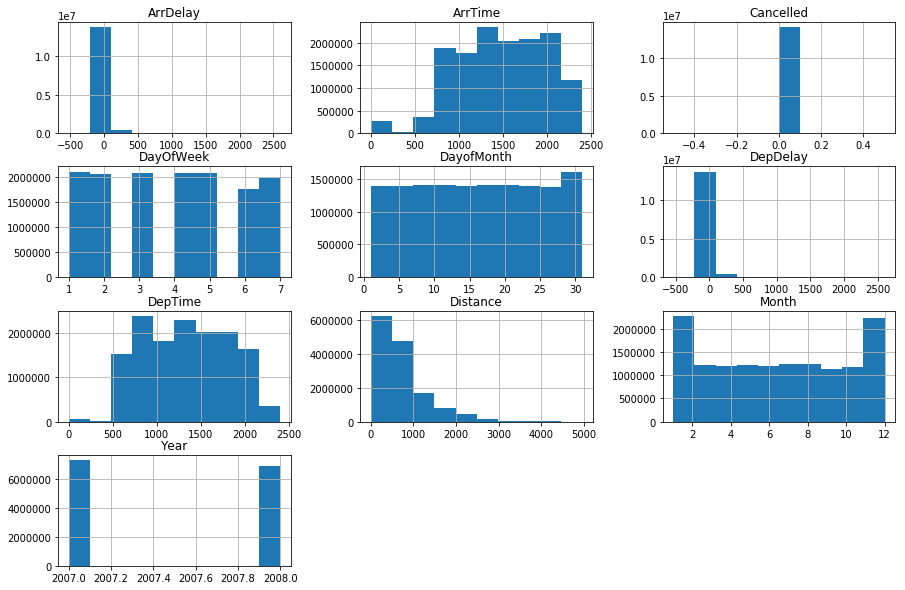

In [196]:
# check qucik histogram
df_clean.hist(figsize=[15, 10]);

In [197]:
#delayed_flights = df.query("DepDelay >=0 ")
#print(delayed_flights.head())

#print(delayed_flights.info())
#print(delayed_flights.shape)

In [146]:
#delayed_flights.to_csv('delayed_flights.csv', index=False)

In [140]:
#delayed_flights= pd.read_csv('delayed_flights.csv', nrows=None, encoding='latin-1')


###  DELAYED FLIGHTS VS. ALL FLIGHTS


In [141]:
#delayed_flights.apply(lambda x: dt.date(x['Year'], x['Month'], x['DayofMonth']), axis=1)

In [142]:
#df_clean['CRSDate'] = df_all_flights.apply(lambda x: dt.date(x['Year'], x['Month'], x['DayofMonth']), axis=1)

In [198]:
df_clean['Delayed'] = df_clean['DepDelay']>=10
df_clean.head(2)

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,Date,Delayed
0,2007,1,1,1,1232.0,1341.0,WN,1.0,7.0,SMF,ONT,389,0,NaN,2007-01-01,False
1,2007,1,1,1,1918.0,2043.0,WN,8.0,13.0,SMF,PDX,479,0,NaN,2007-01-01,True


In [199]:
df_flights_by_date = pd.DataFrame(df_clean.groupby('Date')['Year'].count())
df_flights_by_date.head(2)

,Year
Date,
2007-01-01,19157
2007-01-02,20970


In [200]:
df_delayed_flights_by_date = pd.DataFrame(df_clean[df_clean['Delayed']==True].groupby('Date')['Year'].count())
df_delayed_flights_by_date.head()

,Year
Date,
2007-01-01,7548
2007-01-02,6967
2007-01-03,5735
2007-01-04,6128
2007-01-05,7660


In [203]:
df_flights_by_date['Date1']=df_flights_by_date.index
df_delayed_flights_by_date['Date1']=df_delayed_flights_by_date.index

In [210]:
df_flights_by_date_both=df_flights_by_date.merge(df_delayed_flights_by_date, how='inner', on='Date1')
df_flights_by_date_both.head(2)

,Year_x,Date_x,Date1,Year_y,Date_y
0,19157,2007-01-01,2007-01-01,7548,2007-01-01
1,20970,2007-01-02,2007-01-02,6967,2007-01-02


In [211]:
df_flights_by_date_both=df_flights_by_date_both.rename(columns={'Year_x':'All_Flights', 'Year_y':'Delayed_Flights'})

In [212]:
df_flights_by_date_both.head(2)

,All_Flights,Date_x,Date1,Delayed_Flights,Date_y
0,19157,2007-01-01,2007-01-01,7548,2007-01-01
1,20970,2007-01-02,2007-01-02,6967,2007-01-02


In [215]:
df_flights_by_date_both['Week_Num']=df_flights_by_date_both['Date1'].apply(lambda x: x.isocalendar()[1])

In [217]:
df_flights_by_week = df_flights_by_date_both[['Week_Num', 'All_Flights', 'Delayed_Flights']]
df_flights_by_week.head()

,Week_Num,All_Flights,Delayed_Flights
0,1,19157,7548
1,1,20970,6967
2,1,20865,5735
3,1,20393,6128
4,1,20273,7660


In [219]:
df_flights_by_week2=df_flights_by_week.groupby(['Week_Num']).sum()
df_flights_by_week2.head()

,All_Flights,Delayed_Flights
Week_Num,,
1,323704,106296
2,267365,56639
3,264222,70437
4,268842,64714
5,265058,68952


In [220]:
df_flights_by_week2['Week_Num']= df_flights_by_week2.index

Text(0, 0.5, 'Number of Flights')

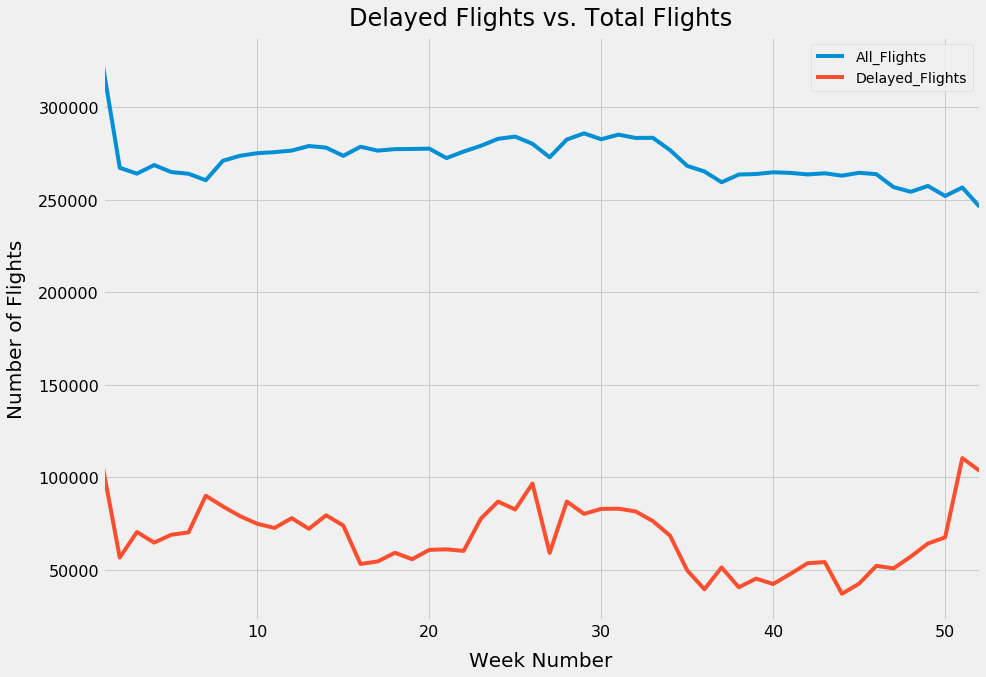

In [222]:
#plt.style.use('fivethirtyeight')
df_flights_by_week2.set_index(['Week_Num']).plot(kind='line', figsize=(14, 10), grid=True, fontsize=16)
plt.title("Delayed Flights vs. Total Flights", fontsize=24, y=1.01)
plt.xlabel("Week Number", fontsize=20, labelpad=12)
plt.ylabel("Number of Flights", fontsize=20, labelpad=12)

Analyse????